In [1]:
import pandas as pd

# Activity log
activity_log_df = pd.read_csv('accessPerDay.csv')
activity_log_df

,Name,Group,Date,Duration
0,Samuel Flowers,T02,2020-11-15,938.900000
1,Samuel Flowers,T02,2020-11-14,1287.916667
2,Samuel Flowers,T02,2020-11-13,745.716667
3,Samuel Flowers,T02,2020-11-12,645.083333
4,Samuel Flowers,T02,2020-11-11,359.500000
...,...,...,...,...
958,Leighton Mack,T03,2020-09-22,239.783333
959,Evelyn Bull,R01,2020-09-22,126.033333
960,Hisham Avalos,T01,2020-09-15,125.750000
961,Sadie Hunt,T03,2020-10-04,52.000000


In [2]:
activity_log_df.info()

# Data has no NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      963 non-null    object 
 1   Group     963 non-null    object 
 2   Date      963 non-null    object 
 3   Duration  963 non-null    float64
dtypes: float64(1), object(3)
memory usage: 30.2+ KB


# Q1a

In [3]:
# Group students and sum their activity time
total_activity_time_df = activity_log_df.groupby(['Name'])['Duration'].sum().reset_index()
total_activity_time_df

,Name,Duration
0,Ailsa Yoder,5903.450000
1,Aimee Duncan,4571.750000
2,Ainsley Fry,28.816667
3,Aleksander Tucker,16283.016667
4,Alesha Walker,1846.400000
...,...,...
84,Vihaan Jackson,1260.316667
85,Wilfred Wiley,3455.466667
86,Zaynah Santos,1375.666667
87,Zephaniah Allman,893.883333


In [4]:
total_activity_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      89 non-null     object 
 1   Duration  89 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [5]:
total_activity_time_df.to_csv('total_activity_time.csv')

# Q1b(i)

In [6]:
activity_log_df

,Name,Group,Date,Duration
0,Samuel Flowers,T02,2020-11-15,938.900000
1,Samuel Flowers,T02,2020-11-14,1287.916667
2,Samuel Flowers,T02,2020-11-13,745.716667
3,Samuel Flowers,T02,2020-11-12,645.083333
4,Samuel Flowers,T02,2020-11-11,359.500000
...,...,...,...,...
958,Leighton Mack,T03,2020-09-22,239.783333
959,Evelyn Bull,R01,2020-09-22,126.033333
960,Hisham Avalos,T01,2020-09-15,125.750000
961,Sadie Hunt,T03,2020-10-04,52.000000


In [7]:
# Mean of groups in descending order
group_df = activity_log_df.groupby(['Group'])['Duration'].mean().sort_values(ascending=False).reset_index()
group_df

,Group,Duration
0,T02,359.867155
1,T01,352.963653
2,T03,276.828251
3,R01,63.526667


# Q1b(ii)

In [8]:
activity_log_df

,Name,Group,Date,Duration
0,Samuel Flowers,T02,2020-11-15,938.900000
1,Samuel Flowers,T02,2020-11-14,1287.916667
2,Samuel Flowers,T02,2020-11-13,745.716667
3,Samuel Flowers,T02,2020-11-12,645.083333
4,Samuel Flowers,T02,2020-11-11,359.500000
...,...,...,...,...
958,Leighton Mack,T03,2020-09-22,239.783333
959,Evelyn Bull,R01,2020-09-22,126.033333
960,Hisham Avalos,T01,2020-09-15,125.750000
961,Sadie Hunt,T03,2020-10-04,52.000000


In [9]:
students_df = activity_log_df.groupby(['Name'])['Duration'].sum()\
                                .sort_values(ascending=False).reset_index()
students_df

,Name,Duration
0,Karim Duggan,17991.683334
1,Samuel Flowers,17442.266667
2,Aleksander Tucker,16283.016667
3,Ellouise Storey,13925.300000
4,Bertie Knox,13242.716667
...,...,...
84,Evelyn Bull,126.033333
85,Hisham Avalos,125.750000
86,Sadie Hunt,52.000000
87,Ainsley Fry,28.816667


In [10]:
top3_most_active_df = students_df.head(3)
top3_most_active_df

,Name,Duration
0,Karim Duggan,17991.683334
1,Samuel Flowers,17442.266667
2,Aleksander Tucker,16283.016667


In [11]:
top3_least_active_df = students_df.tail(3)
top3_least_active_df

,Name,Duration
86,Sadie Hunt,52.000000
87,Ainsley Fry,28.816667
88,Dion Huff,4.733333


# Q1c

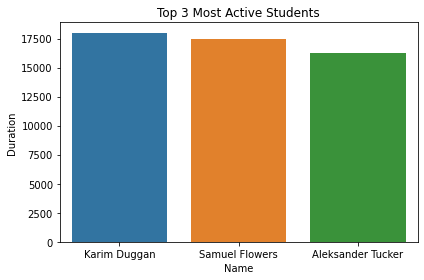

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

figure, ax = plt.subplots()

ax = sns.barplot(x=top3_most_active_df['Name'], y=top3_most_active_df['Duration'])

ax.set_title("Top 3 Most Active Students")
figure.tight_layout()

# Q1d

In [13]:
# Get names of top 3 most active students
merged_top3_most_df = top3_most_active_df.copy()
merged_top3_most_df.drop(columns=['Duration'], inplace=True)
merged_top3_most_df

,Name
0,Karim Duggan
1,Samuel Flowers
2,Aleksander Tucker


In [14]:
# Merge for date and duration
merged_top3_most_df = merged_top3_most_df.merge(activity_log_df, how='left', on=['Name'])
merged_top3_most_df

,Name,Group,Date,Duration
0,Karim Duggan,T02,2020-11-14,1257.816667
1,Karim Duggan,T02,2020-11-13,610.633333
2,Karim Duggan,T02,2020-11-12,359.666667
3,Karim Duggan,T02,2020-11-10,359.616667
4,Karim Duggan,T02,2020-11-09,718.633333
...,...,...,...,...
113,Aleksander Tucker,T02,2020-09-27,487.250000
114,Aleksander Tucker,T02,2020-09-25,359.900000
115,Aleksander Tucker,T02,2020-09-23,462.783333
116,Aleksander Tucker,T02,2020-09-21,359.916667


In [15]:
merged_top3_most_df.drop(columns=['Group'], inplace=True)
merged_top3_most_df

,Name,Date,Duration
0,Karim Duggan,2020-11-14,1257.816667
1,Karim Duggan,2020-11-13,610.633333
2,Karim Duggan,2020-11-12,359.666667
3,Karim Duggan,2020-11-10,359.616667
4,Karim Duggan,2020-11-09,718.633333
...,...,...,...
113,Aleksander Tucker,2020-09-27,487.250000
114,Aleksander Tucker,2020-09-25,359.900000
115,Aleksander Tucker,2020-09-23,462.783333
116,Aleksander Tucker,2020-09-21,359.916667


In [16]:
# Get names of top 3 least active students
merged_top3_least_df = top3_least_active_df.copy()
merged_top3_least_df.drop(columns=['Duration'], inplace=True)
merged_top3_least_df

,Name
86,Sadie Hunt
87,Ainsley Fry
88,Dion Huff


In [17]:
# Merge for date and duration
merged_top3_least_df = merged_top3_least_df.merge(activity_log_df, how='left', on=['Name'])
merged_top3_least_df

,Name,Group,Date,Duration
0,Sadie Hunt,T03,2020-10-04,52.000000
1,Ainsley Fry,R01,2020-09-16,28.816667
2,Dion Huff,R01,2020-11-12,4.733333


In [18]:
merged_top3_least_df.drop(columns=['Group'], inplace=True)
merged_top3_least_df

,Name,Date,Duration
0,Sadie Hunt,2020-10-04,52.000000
1,Ainsley Fry,2020-09-16,28.816667
2,Dion Huff,2020-11-12,4.733333


In [19]:
# Merge both df to plot
merged_df = merged_top3_most_df.append(merged_top3_least_df).reset_index(drop=True)
merged_df

,Name,Date,Duration
0,Karim Duggan,2020-11-14,1257.816667
1,Karim Duggan,2020-11-13,610.633333
2,Karim Duggan,2020-11-12,359.666667
3,Karim Duggan,2020-11-10,359.616667
4,Karim Duggan,2020-11-09,718.633333
...,...,...,...
116,Aleksander Tucker,2020-09-21,359.916667
117,Aleksander Tucker,2020-09-17,360.016667
118,Sadie Hunt,2020-10-04,52.000000
119,Ainsley Fry,2020-09-16,28.816667


In [20]:
# Sort Date
merged_df = merged_df.sort_values(['Date']).reset_index(drop=True)
merged_df

,Name,Date,Duration
0,Samuel Flowers,2020-09-15,142.700000
1,Karim Duggan,2020-09-15,125.933333
2,Ainsley Fry,2020-09-16,28.816667
3,Karim Duggan,2020-09-16,423.600000
4,Samuel Flowers,2020-09-16,124.133333
...,...,...,...
116,Aleksander Tucker,2020-11-14,995.883333
117,Samuel Flowers,2020-11-14,1287.916667
118,Karim Duggan,2020-11-14,1257.816667
119,Aleksander Tucker,2020-11-15,703.300000


/home/labsuser/ict233Python3venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


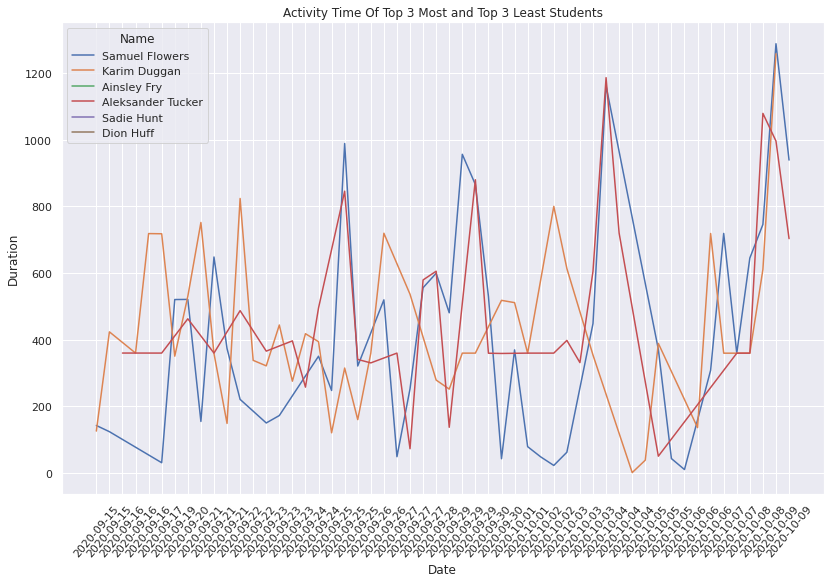

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

figure, ax = plt.subplots()

ax = sns.lineplot(x='Date', y='Duration', data=merged_df, hue='Name')
ax.set_xticklabels(merged_df['Date'], rotation=50)

ax.set_title('Activity Time Of Top 3 Most and Top 3 Least Students')
figure.tight_layout()